In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df['Outcome'].shape  #768


(768,)

In [5]:
outcome_1=df[df['Outcome']==1]
outcome_1 #268

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [6]:
X=df.loc[:,['Insulin','BMI']]
X

,Insulin,BMI
0,0,33.6
1,0,26.6
2,0,23.3
3,94,28.1
4,168,43.1
...,...,...
763,180,32.9
764,0,36.8
765,112,26.2
766,0,30.1


In [7]:
Y=df.loc[:,['Outcome']]
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=24)



In [9]:
from sklearn import tree

In [10]:
clf=tree.DecisionTreeClassifier(criterion="gini")

In [11]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [12]:
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
cm=confusion_matrix(Y_test,y_test_pred)
print(cm)

[[77 21]
 [29 27]]


In [15]:
recall_diabetes=78/(98)
recall_diabetes

0.7959183673469388

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_test_pred))

0.6753246753246753


In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
df_assignment=pd.read_csv('diabetes.csv')

In [19]:
df_assignment.drop(columns=['Glucose','SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'], inplace =True)

In [20]:
df_assignment

,Pregnancies,BloodPressure,Outcome
0,6,72,1
1,1,66,0
2,8,64,1
3,1,66,0
4,0,40,1
...,...,...,...
763,10,76,0
764,2,70,0
765,5,72,0
766,1,60,1


In [21]:
XX=df_assignment.loc[:,['Pregnancies','BloodPressure']]
YY=df_assignment.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
xx_train,xx_test,yy_train,yy_test=train_test_split(XX,YY,test_size=0.2, random_state=24)


In [23]:
clf1=tree.DecisionTreeClassifier(criterion="gini")
clf1.fit(xx_train,yy_train)

DecisionTreeClassifier()

In [24]:
yy_train_pred=clf1.predict(xx_train)
yy_test_pred=clf1.predict(xx_test)

In [25]:
cm1=confusion_matrix(yy_test,yy_test_pred)
print(cm1)

[[73 25]
 [41 15]]


In [26]:
prec=73/(73+25)
prec

0.7448979591836735

<Axes: xlabel='Pregnancies', ylabel='count'>

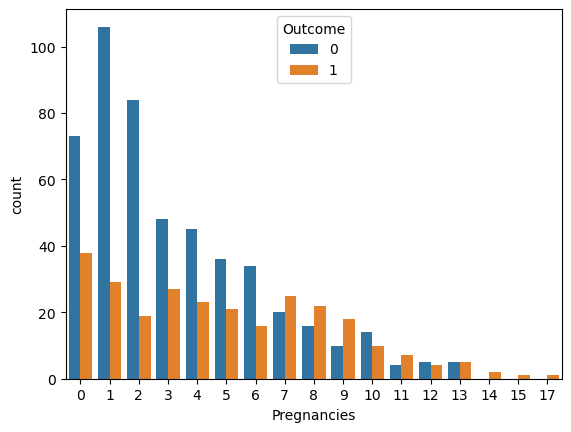

In [27]:
pregancy_data=df.groupby(['Pregnancies','Outcome'])['Outcome'].count().reset_index(name="count") 
sns.barplot(data=pregancy_data,x='Pregnancies',y='count',hue='Outcome')